# 01. PyTorch Workflow Excercise

Excerise: 
<https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb>

Solution:
<https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/01_pytorch_workflow_exercise_solutions.ipynb>

In [72]:
# Last updated
import datetime
print(f"Last updated on: {datetime.datetime.now()}")

Last updated on: 2024-08-10 15:16:58.793798


In [73]:
# Import necessary libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [74]:
# Set up device-agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [75]:
# Create the data parameters
weight = 0.3
bias = 0.9

torch.random.manual_seed(42)

# make X and y using linear regression feature
X = torch.arange(0,1,0.01).unsqueeze(dim = 1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [76]:
# split the data into training and testing
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

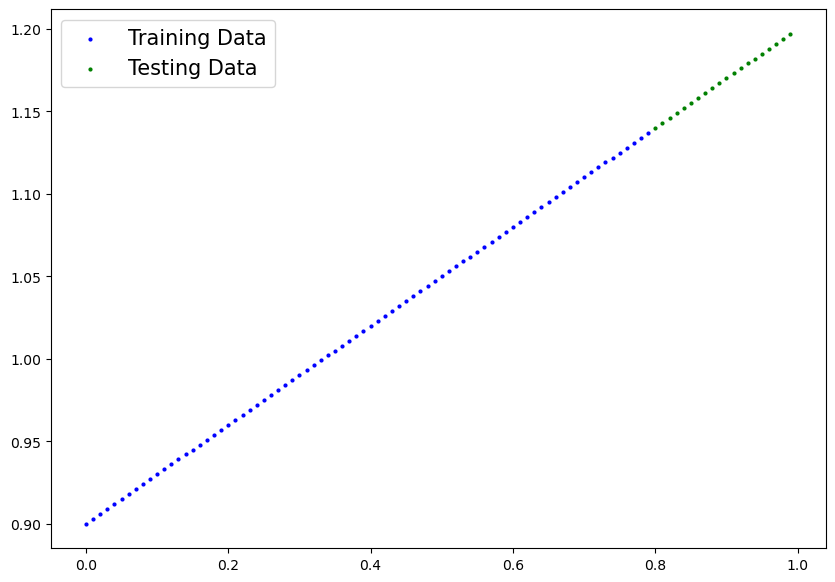

In [77]:
# Plot the training and test data
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data', s=4)
    plt.scatter(test_data, test_labels, c='g', label='Testing Data', s=4)
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions', s=4)
    plt.legend(prop = {'size': 15})

plot_predictions()


## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [78]:
# Create Pytorch Linear Regression Model by subclassing nn.Module

# class LinearRegressionModel(nn.Module):
#     def __init__ (self,):
#         super().__init__()
#         self.weight = nn.Parameter(data=torch.randn(1,
#                                                requires_grad=True,
#                                                dtype=torch.float))
#         self.bias = nn.Parameter(data=torch.randn(1,
#                                              requires_grad=True,
#                                              dtype=torch.float))
        
#     def forward(self, x):
#         return self.weight * x + self.bias

## Option 2
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
  def forward(self,x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [79]:
next(model_1.parameters()).device

device(type='cpu')

In [80]:
# Instantiate the model and put it to the target device
model_1 = LinearRegressionModel().to(device)
list(model_1.parameters())

[Parameter containing:
 tensor([[-0.2343]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.9186], device='cuda:0', requires_grad=True)]

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [81]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [82]:
print("y_pred shape:", y_pred.shape)
print("y_train shape:", y_train.shape)

y_pred shape: torch.Size([20, 1])
y_train shape: torch.Size([80, 1])


In [83]:
# Training Loop

# Traing model for 300 epochs
torch.manual_seed(42)
num_epochs = 300

# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(num_epochs):
    ### Training
    
    # put the model in training mode
    model_1.train()

    # 1) Forward pass
    y_pred = model_1(X_train)
    # 2) Calculate the loss
    loss = loss_fn(y_pred, y_train)
    # 3) Zero the gradients
    optimizer.zero_grad()
    # 4) Backward pass
    loss.backward()
    # 5) Step the optimizer
    optimizer.step()
    
    ### Perform testing every 20 epochs
    if epoch % 20 == 0:
        # put the model in evaluation mode and setup inference context
        model_1.eval()
        with torch.inference_mode():
            # 1) Forward pass
            y_test_pred = model_1(X_test)
            # 2) Calculate the loss
            test_loss = loss_fn(y_test_pred, y_test)
            # Print out what's happening
            print(f"Epoch: {epoch}, Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

Epoch: 0, Loss: 0.1935, Test Loss: 0.4470
Epoch: 20, Loss: 0.0997, Test Loss: 0.2775
Epoch: 40, Loss: 0.0829, Test Loss: 0.2095
Epoch: 60, Loss: 0.0752, Test Loss: 0.1795
Epoch: 80, Loss: 0.0683, Test Loss: 0.1608
Epoch: 100, Loss: 0.0615, Test Loss: 0.1444
Epoch: 120, Loss: 0.0546, Test Loss: 0.1285
Epoch: 140, Loss: 0.0478, Test Loss: 0.1121
Epoch: 160, Loss: 0.0409, Test Loss: 0.0958
Epoch: 180, Loss: 0.0341, Test Loss: 0.0798
Epoch: 200, Loss: 0.0272, Test Loss: 0.0635
Epoch: 220, Loss: 0.0204, Test Loss: 0.0472
Epoch: 240, Loss: 0.0135, Test Loss: 0.0312
Epoch: 260, Loss: 0.0067, Test Loss: 0.0149
Epoch: 280, Loss: 0.0031, Test Loss: 0.0068


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [84]:
X_test.device

device(type='cuda', index=0)

In [85]:
# Make predictions with the models

model_1.eval()
with torch.inference_mode():
    y_pred = model_1(X_test.to(device)).detach().cpu()

y_pred

tensor([[1.1340],
        [1.1369],
        [1.1398],
        [1.1427],
        [1.1457],
        [1.1486],
        [1.1515],
        [1.1544],
        [1.1574],
        [1.1603],
        [1.1632],
        [1.1661],
        [1.1691],
        [1.1720],
        [1.1749],
        [1.1778],
        [1.1808],
        [1.1837],
        [1.1866],
        [1.1896]])

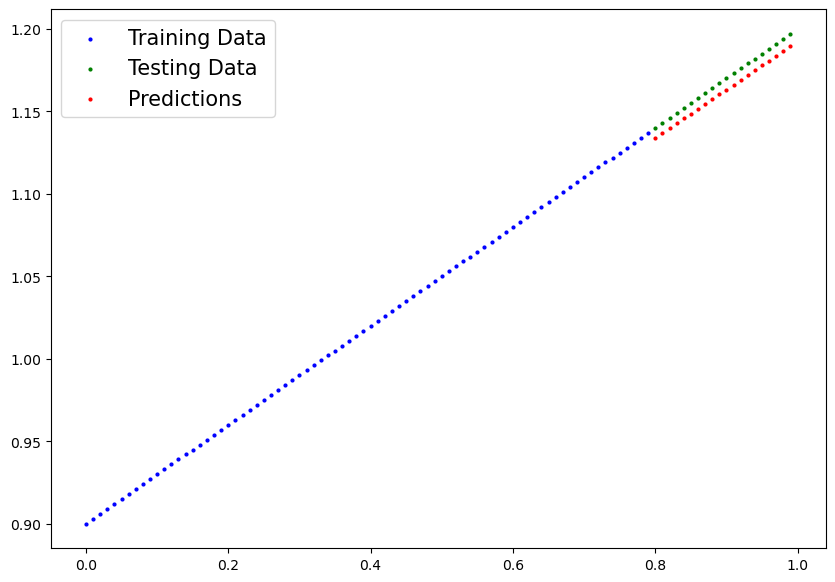

In [86]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_pred)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [87]:
from pathlib import Path 

# 1) Create models directory
Path("models").mkdir(parents=True, exist_ok=True)

# 2) Create model save path
model_save_path = Path("models/01a_pytorch_workflow_excerise_model_1.pth")

# 3) Save the model state_dict
torch.save(model_1.state_dict(), model_save_path)


In [88]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_1 = LinearRegressionModel().to(device)
loaded_model_1.load_state_dict(torch.load(f=model_save_path))

C:\Users\j_m_r\AppData\Local\Temp\ipykernel_32192\3404178923.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=model_save_path)

<All keys matched successfully>

In [89]:
# Make predictions with loaded model and compare them to the previous
loaded_model_1.eval()
with torch.inference_mode():
    y_pred_loaded = loaded_model_1(X_test.to(device)).detach().cpu()

# compare
(y_pred == y_pred_loaded).all()

tensor(True)

In [90]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2926]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8999], device='cuda:0'))])